# Auto Insurance Claims Fraud Detection - Data Cleansing

After conducting the initial data exploration in notebook `1-data-exploration`, the subsequent task involves cleaning the data and extracting features.

## 1.2 Data Cleansing
Following non exauhstive list can be used for guidelines:

* __Data types__ <br>
Check if data types of columns match their content. For example, ensure that age is stored as an integer and not as a string
* __Ranges__<br>
Verify if the value distribution of values in a column makes sense. Utilize statistics such as minimum, maximum, mean, and standard deviation, along with visualizations like box plots and histograms for assistance
* __Emptiness__<br>
Ensure that all values are non-null where mandatory. For instance, check if client IDs are present
* __Uniqueness__<br>
Check for duplicates where undesired. For example, ensure that client IDs are unique
* __Set memberships__<br>
Validate if only allowed values are chosen for categorical or ordinal fields. For instance, check for values like Female, Male, or Unknown
* __Foreign key set memberships__<br>
Ensure that only allowed values are chosen for a field, such as ZIP codes
* __Regular Expressions__<br>
Some files need to adhere to a specific pattern expressed by a regular expression. For example, a lower-case character followed by six digits
* __Cross-field validation__<br>
Validate if certain fields impact the validity of others. 
For instance, ensuring that a vehicle's mileage is not labeled as negative is a form of cross-field validation

In [1]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('data/insurance_claims.csv')

In [3]:
nRow, nCol = data.shape
print(f'There are {nRow} and {nCol} columns.')

There are 1000 and 40 columns.


In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


__Data types__ <br>
Are data types of columns matching their content? E.g. is age stored as integer and not as string?

In [5]:
# Convert date Columns to Datetime
data.loc[:, 'incident_date'] = pd.to_datetime(data.incident_date)
data.loc[:, 'policy_bind_date'] = pd.to_datetime(data.policy_bind_date)

# Convert other object columns to Categorical dtypes
data = data.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

In [6]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                         category
policy_csl                           category
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                          category
insured_education_level              category
insured_occupation                   category
insured_hobbies                      category
insured_relationship                 category
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                        category
collision_type                       category
incident_severity                    category
authorities_contacted             

__Ranges__<br>
Does the value distribution of values in a column make sense? Use stats (e.g. min, max, mean, standard deviation) and visualizations (e.g. box-plot, histogram) for help

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


Note:
* umbrella_limit can be negative?

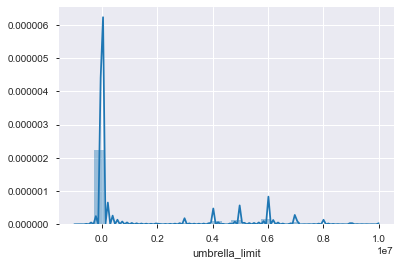

In [8]:
sns.distplot(data.umbrella_limit);

In [9]:
suspicious = data.query('umbrella_limit < 0')
suspicious

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
290,284,42,526039,1995-05-04,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,2015-01-29,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,NaN


In [10]:
# remove this point as outlier
data = data.drop(suspicious.index, axis=0)
# or 
# data[~data.policy_number.isin(suspicious.policy_number)]
data.shape

(999, 40)

__Emptiness__<br>
Are all values non-null where mandatory? E.g. client IDs

In [11]:
missing_values = data.isnull().sum() * 100 / len(data)
missing_values.sort_values(ascending=False).head()

_c39              100.0
fraud_reported      0.0
incident_date       0.0
capital-loss        0.0
capital-gains       0.0
dtype: float64

In [12]:
# Drop column _c39
data = data.drop(['_c39'], axis=1)

__Uniqueness__<br>
Are duplicates present where undesired? E.g. client IDs

In [13]:
print(f'Data has {data.shape[0]} rows. Number of unique rows is {data.policy_number.nunique()}.')

Data has 999 rows. Number of unique rows is 999.


__Set memberships__<br>
Are only allowed values chosen for categorical or ordinal fields? E.g. Female, Male, Unknown

In [14]:
for col in data.select_dtypes('category').columns:
    print(f'Column {col}: \n {data[col].unique().categories.values}\n')

Column policy_state: 
 ['OH' 'IN' 'IL']

Column policy_csl: 
 ['250/500' '100/300' '500/1000']

Column insured_sex: 
 ['MALE' 'FEMALE']

Column insured_education_level: 
 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

Column insured_occupation: 
 ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

Column insured_hobbies: 
 ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

Column insured_relationship: 
 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

Column incident_type: 
 ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

Column collision_type: 


* Some columns have `?` that represend unknown values. 
* Some columns have high cardinality, check it.
* Target column has [Y,N] values. Encode it to integer [0,1]

Apart from that all good.

In [15]:
# Check which columns have ? for unknown
(data == '?').sum(axis=0).sort_values(ascending=False).head()

C:\Users\efilgva\AppData\Local\Continuum\anaconda3\envs\py3.6-tensorflow\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


property_damage            360
police_report_available    342
collision_type             178
capital-gains                0
insured_relationship         0
dtype: int64

In [16]:
# Check how many ? per row
(data == '?').sum(axis=1).value_counts().sort_values(ascending=False)

1    460
0    340
2    177
3     22
dtype: int64

In [17]:
# Find high cardinality features
high_cardinality = (data
     .select_dtypes(include=['category'])
     .apply(lambda x: x.nunique(), axis=0) # columns
     .sort_values(ascending=False)
)
high_cardinality

incident_location          999
auto_model                  39
insured_hobbies             20
insured_occupation          14
auto_make                   14
insured_education_level      7
incident_city                7
incident_state               7
insured_relationship         6
authorities_contacted        5
incident_severity            4
collision_type               4
incident_type                4
policy_csl                   3
policy_state                 3
property_damage              3
police_report_available      3
insured_sex                  2
fraud_reported               2
dtype: int64

In [18]:
# Drop high cardinality features based on above result 
# + policy number - ID 
data = data.drop(['incident_location', 'auto_model', 'policy_number'], 
          axis=1)
data.shape

(999, 36)

In [19]:
# Drop features that have a single value since they cannot discriminate between classes.
# NA

In [20]:
# Label encode target column with 0 and 1
data['fraud_reported'] = data['fraud_reported'].replace({'Y':1, 'N':0})

__Foreign key set memberships__<br>
Are only allowed values chosen a field? E.g. ZIP code

NA

__Regular Expressions__<br>
Some files need to stick to a pattern expressed by a regular expression. E.g. a lower-case character followed by 6 digits

In [21]:
# Check is incident_state only 2 letters
(data.incident_state.str.len() == 2).all()

True

__Cross-field validation__<br>
Some fields can impact validity of other fields. E.g. a male person can’t be pregnant

NA

## Store clean data

In [22]:
def to_csv(df, path):
    # Prepend dtypes to the top of df
    df2 = df.copy()
    df2.loc[-1] = df2.dtypes
    df2.index = df2.index + 1
    df2.sort_index(inplace=True)
    # Then save it to a csv
    df2.to_csv(path, index=False)

def read_csv(path):
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path,    
              nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

In [23]:
data.shape

(999, 36)

In [24]:
to_csv(data, 'data/insurance_claims_clean.csv')